<a href="https://colab.research.google.com/github/AymanAlnajjar/Prediction-of-Product-Sales/blob/main/Prediction_of_Product_Sale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Product Sales





- Author: Ayman Alnajjar

## Project Overview

This project focuses on building a sales prediction model for food items sold across multiple retail stores. The objective is to help retailers analyze and understand key factors such as product characteristics and store attributes, that influence sales performance.

## Load and Inspect Data

In [2]:
# Import required packages
import pandas as pd
import numpy as np

# Save the fileURL and load the data as "df"
url = "https://drive.google.com/uc?export=download&id=1syH81TVrbBsdymLT_jl2JIf6IjPXtSQw"
df = pd.read_csv(url)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Clean Data

In [3]:
df.shape

(8523, 12)

We have

*   12 Colmuns
*   8523 Rows






In [4]:
df.dtypes

,0
Item_Identifier,object
Item_Weight,float64
Item_Fat_Content,object
Item_Visibility,float64
Item_Type,object
Item_MRP,float64
Outlet_Identifier,object
Outlet_Establishment_Year,int64
Outlet_Size,object
Outlet_Location_Type,object


In [5]:
df.duplicated().sum()

np.int64(0)

* We don't have duplicates

In [6]:
df.isna().sum()
df.isna().sum() / len(df) * 100

,0
Item_Identifier,0.000000
Item_Weight,17.165317
Item_Fat_Content,0.000000
Item_Visibility,0.000000
Item_Type,0.000000
Item_MRP,0.000000
Outlet_Identifier,0.000000
Outlet_Establishment_Year,0.000000
Outlet_Size,28.276428
Outlet_Location_Type,0.000000


* we have missing values in two colmuns Item_Weight and Outlet_size

In [7]:

df['Item_Weight'].value_counts()

,count
Item_Weight,
12.150,86
17.600,82
13.650,77
11.800,76
15.100,68
...,...
8.920,2
6.520,1
9.420,1


* i can see a relation between the item type and item weight so imputing the missing value based on the median of each item type would be the best solution here

In [8]:
#df["Item_Weight"] = df.groupby("Item_Type")["Item_Weight"].transform(lambda s: s.fillna(s.median()))


In [9]:
df.isna().sum()
df['Outlet_Size'].value_counts()

,count
Outlet_Size,
Medium,2793
Small,2388
High,932


* with the outlet size there is no obvius indecator to predect what data could be filled here

In [10]:
#df["Outlet_Size"] = df["Outlet_Size"].fillna("Missing")
df.isna().sum()
df.isna().sum()/len(df) * 100

,0
Item_Identifier,0.000000
Item_Weight,17.165317
Item_Fat_Content,0.000000
Item_Visibility,0.000000
Item_Type,0.000000
Item_MRP,0.000000
Outlet_Identifier,0.000000
Outlet_Establishment_Year,0.000000
Outlet_Size,28.276428
Outlet_Location_Type,0.000000


In [11]:
categorical_cols = df.select_dtypes(include="object").columns

for col in categorical_cols:
    print(f"\nColumn: {col}")
    print(df[col].value_counts())


Column: Item_Identifier
Item_Identifier
FDW13    10
FDG33    10
FDX31     9
FDT07     9
NCY18     9
         ..
FDO33     1
FDK57     1
FDT35     1
FDN52     1
FDE52     1
Name: count, Length: 1559, dtype: int64

Column: Item_Fat_Content
Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

Column: Item_Type
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

Column: Outlet_Identifier
Outlet_Identifier
OUT027    935
OUT013    932
OUT035    930
OUT049    930
OU

* We have inconsistancy in Item_Fat_Content LF should be Low Fat, reg should be Regular, lowfat the l and the f should be capital

In [12]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'})
df['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5517
Regular,3006


* We will now view use df.describe() to view the summary statistics for the numeric features.




In [13]:
stats =  df.describe()
stats.loc[['mean','min','max']]

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
min,4.555000,0.000000,31.290000,1985.000000,33.290000
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## Exploratory Data Analysis



*   Histogram to view the distributions of various features in your dataset.
*   Boxplot to view statistical summaries of various features in your dataset.
*   Heatmap of the correlation between features.




 Viewing the destribution of items sales

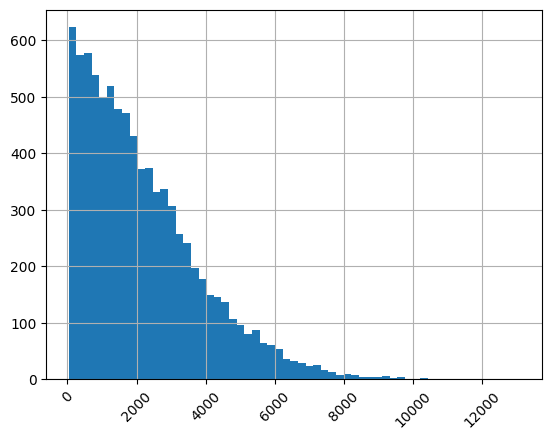

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = df['Item_Outlet_Sales'].hist(bins = 'auto')
ax.tick_params(axis='x', rotation = 45)
ax.ticklabel_format(style='plain')

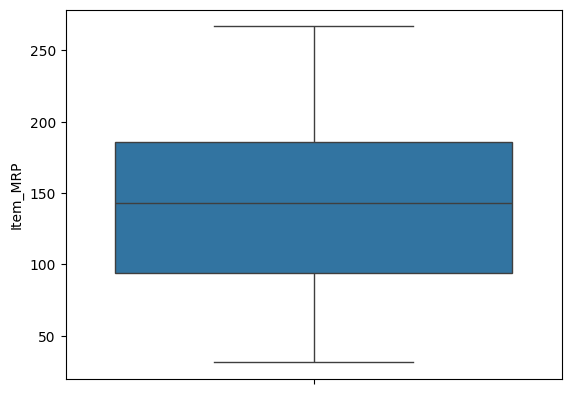

In [15]:
ax = sns.boxplot(data=df, y="Item_MRP")

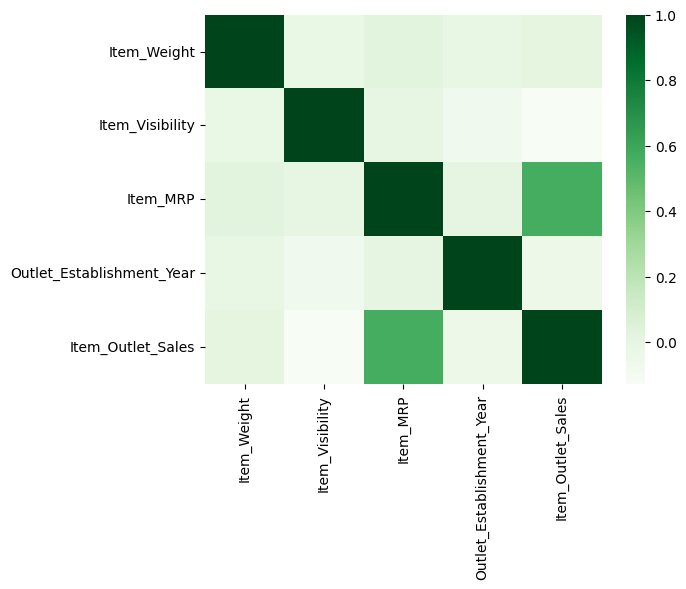

In [16]:
corr = df.corr(numeric_only = True)
corr.round(2)
sns.heatmap(corr, cmap = 'Greens');

## Feature Inspection

### Inspecting Item_Weight feature

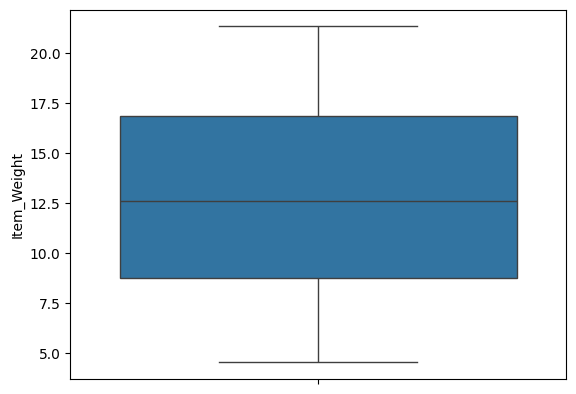

In [17]:
ax = sns.boxplot(data=df, y="Item_Weight")


* Item_Weight is a numeric feature
* has 1463 null Values, 17.16%, i can see a relation between the item type and item weight so imputing the missing value based on the median of each item type would be the best solution here
* the feature isn't constant
* not  cardinate applicable (numeric feature)
* there is no business need to exclude this feature

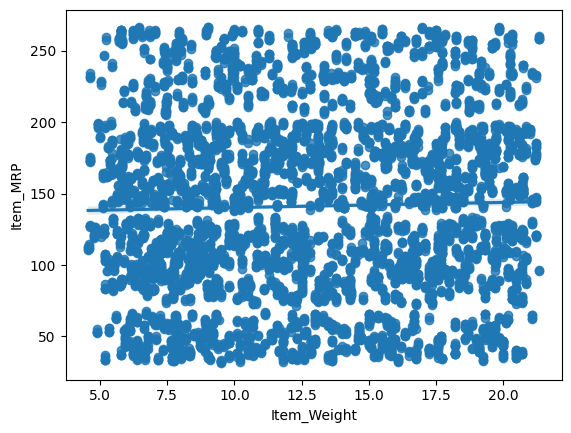

In [18]:
ax = sns.regplot(data=df, x="Item_Weight", y="Item_MRP");

We have no correlation between Item_weight and Item_MRP, so we should exclude this feature as it's not a predictor of our target


---



We will proceed with the sales prediction project. This step involves using machine learning to forecast future sales based on the provided data, aiming to assist the retailer. In Part 5, we will revisit the original, uncleaned sales prediction dataset to avoid data leakage.

In [1]:

import pandas as pd
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn import set_config
set_config(transform_output='pandas')
# Save the fileURL and load the data as "df2"
url = "https://drive.google.com/uc?export=download&id=1syH81TVrbBsdymLT_jl2JIf6IjPXtSQw"
df2 = pd.read_csv(url)
df2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Data Cleaning

In [19]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({
    'LF': 'Low Fat',
    'low fat': 'Low Fat',
    'reg': 'Regular'
})
#derive store age instead of year
df['Outlet_Age'] = 2023 - df['Outlet_Establishment_Year']


## preprocessing

In [22]:
target = "Item_Outlet_Sales"
X = df.drop(columns=[target, 'Item_Identifier','Outlet_Identifier'])
y = df[target]


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Age
4776,16.350,Low Fat,0.029565,Household,256.4646,2009,Medium,Tier 3,Supermarket Type2,14
7510,15.250,Regular,0.000000,Snack Foods,179.7660,2009,Medium,Tier 3,Supermarket Type2,14
5828,12.350,Regular,0.158716,Meat,157.2946,1999,Medium,Tier 1,Supermarket Type1,24
5327,7.975,Low Fat,0.014628,Baking Goods,82.3250,2004,Small,Tier 2,Supermarket Type1,19
4810,19.350,Low Fat,0.016645,Frozen Foods,120.9098,2002,NaN,Tier 2,Supermarket Type1,21


### Piplines and Transformers

We Have Two Ordinal features Outlet_size & Outlet_Location_Type

In [ ]:
ordinal_mappings = {
    "Outlet_Size": [["Small", "Medium", "High"]],
    "Outlet_Location_Type": [["Tier 1", "Tier 2", "Tier 3"]]}

# Create Ordinal pipeline
ordinal_pipe = make_pipeline(SimpleImputer(strategy="most_frequent"),OrdinalEncoder(categories=[ordinal_mappings["Outlet_Size"][0],ordinal_mappings["Outlet_Location_Type"][0]])
)

# ============================
# Split feature groups
# ============================
ordinal_features = ["Outlet_Size", "Outlet_Location_Type"]

# Keep the rest categorical as nominal
cat_features = [col for col in X.columns
                if X[col].dtype == "object" and col not in ordinal_features]

# ============================
# Pipelines
# ============================
# Nominal categorical pipeline
cat_pipe = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore", sparse=False)
)

# Numeric pipeline
num_pipe = make_pipeline(
    SimpleImputer(strategy="mean"),
    StandardScaler()
)

# ============================
# Final ColumnTransformer
# ============================
preprocessor = ColumnTransformer([
    ("ordinal", ordinal_pipe, ordinal_features),
    ("categorical", cat_pipe, cat_features),
    ("numeric", num_pipe, make_column_selector(dtype_include="number"))
])

# ============================
# Fit-Transform Example
# ============================
X_train_prepared = preprocessor.fit_transform(X_train)
X_test_prepared = preprocessor.transform(X_test)

print("Train shape:", X_train_prepared.shape)
print("Test shape:", X_test_prepared.shape)